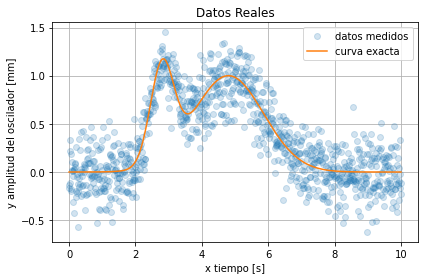

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit,least_squares
import pandas as pd

x_datos  = np.linspace(0, 10, 1000)
y_exacto = np.exp(-(x_datos-2.8)**2/0.5**2)+np.exp(-(x_datos-4.8)**2/1.5**2)

# Para comparar después, Parámetros en orden de aparición:
parametros_reales = [2.8, 0.5, 4.8, 1.5]

# agregamos ruido
np.random.seed(1729)
y_ruido = 0.2 * np.random.normal(size=x_datos.size)
y_datos = y_exacto + y_ruido

# Graficamos
plt.figure()
plt.plot(x_datos,  y_datos, 'o', label='datos medidos', alpha = 0.2)
plt.plot(x_datos, y_exacto, '-', label='curva exacta')
plt.legend(loc='best')
plt.title("Datos Reales")
plt.xlabel('x tiempo [s]')
plt.ylabel('y amplitud del oscilador [mm]')
plt.grid()
plt.tight_layout()



In [3]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x_datos, y_datos, test_size = 0.2, random_state = 123)

In [5]:
X_train = X_train.reshape(-1,1)

In [20]:
modelo = SVR(kernel = "rbf", gamma = 0.5, C = 10000)
modelo.fit(x_datos.reshape(-1,1), y_datos.reshape(-1,1))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10000, gamma=0.5)

In [21]:
print('Precisión del modelo:')
print(modelo.score(x_datos.reshape(-1,1), y_datos.reshape(-1, 1)))

Precisión del modelo:
0.802425432795791


In [22]:
predicciones = modelo.predict(X_train)
#print(predicciones)


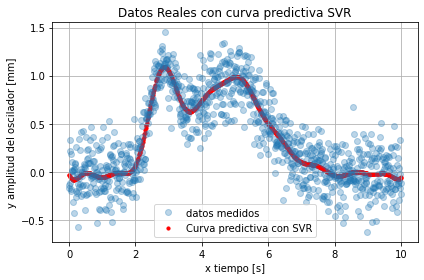

In [23]:
plt.figure()
plt.plot(x_datos,  y_datos, 'o', label='datos medidos', alpha = 0.3)
plt.scatter(X_train, predicciones, label='Curva predictiva con SVR', s = 10, color = "red")
plt.legend(loc='best')
plt.title("Datos Reales con curva predictiva SVR")
plt.xlabel('x tiempo [s]')
plt.ylabel('y amplitud del oscilador [mm]')
plt.grid()
plt.tight_layout()


In [30]:
parametros = {"C": [80, 100, 200], "gamma": [0.1, 0.5]}

grid_search = GridSearchCV(
    estimator = SVR(kernel = "rbf"),
    param_grid = parametros, 
    scoring = "accuracy", 
    n_jobs = -1, 
    cv = 10
)

In [31]:
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


In [32]:
print(best_parameters)

{'C': 80, 'gamma': 0.1}


In [33]:
print(best_accuracy)

nan


In [24]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.linspace(1, 1000, 100)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = SVR(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 1,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan 

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
0,1.0,NaN,NaN,NaN,NaN
1,11.090909,NaN,NaN,NaN,NaN
2,21.181818,NaN,NaN,NaN,NaN
3,31.272727,NaN,NaN,NaN,NaN
4,41.363636,NaN,NaN,NaN,NaN


In [25]:
print(_)

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': array([   1.        ,   11.09090909,   21.18181818,   31.27272727,
         41.36363636,   51.45454545,   61.54545455,   71.63636364,
         81.72727273,   91.81818182,  101.90909091,  112.        ,
        122.09090909,  132.18181818,  142.27272727,  152.36363636,
        162.45454545,  172.54545455,  182.63636364,  192.72727273,
        202.81818182,  212.90909091,  223.        ,  233.09090909,
        243.18...
        727.54545455,  737.63636364,  747.72727273,  757.81818182,
        767.90909091,  778.        ,  788.09090909,  798.18181818,
        808.27272727,  818.36363636,  828.45454545,  838.54545455,
        848.63636364,  858.72727273,  868.81818182,  878.90909091,
        889.        ,  899.09090909,  909.18181818,  919.27272727,
        929.36363636,  939.45454545,  949.54545455,  959.63636364,
        969.72727273,  979.81818182,  989.90909091, 1000.        ])},
             return_train_score